## Project 1 - Part 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime
# from geopy.distance import geodesic
# from geopy.geocoders import Nominatim

In [2]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Team Info 

Project Title: Credit Card Fraud Detection

Team Name: FraudBusters

Team Members: 
    Sanju Kanumuri (sanju), 
    Emanda Seifu (emandats),
    Brianna Detter (bdetter),
    Rahul Ramakrishnan (rramakrishnan106), &
    Harsha Paladugu (harshanba34)

In [3]:
df.shape
df.info()
# print(len(df[df['type'].unique()]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


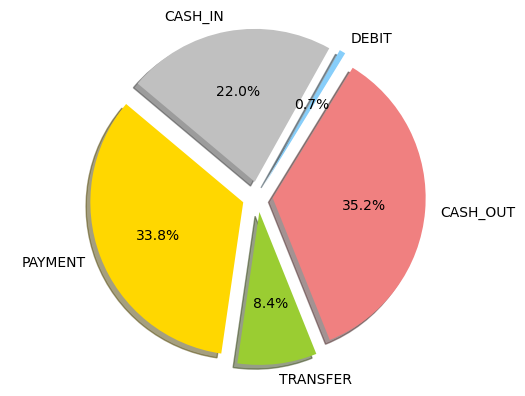

In [4]:
# Data to plot
labels = 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT' ,  "CASH_IN"
sizes = [len(df[df['type']=="PAYMENT"]), len(df[df['type']=="TRANSFER"]), len(df[df['type']=="CASH_OUT"]),  len(df[df['type']=="DEBIT"]),  len(df[df['type']=="CASH_IN"])]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','silver']
explode = (0.1, 0.1, 0.1, 0.1,0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

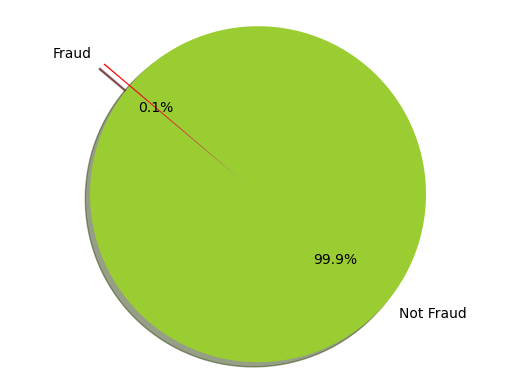

In [5]:
# Note: It was difficult to show both the # of records for both fraudulent and non-fradulent data on a bar graph
# because there are so many fraudulent records and so little non-fraudulent records. This graph can change if needed.

# Data to plot
labels_bar = 'Not Fraud', 'Fraud'
heights_bar = [len(df[df['isFraud']==0]), len(df[df['isFraud']==1])]
colors_bar = ['yellowgreen', 'red']
explode_bar = (0.1, 0.1)

# Plot
plt.pie(heights_bar, explode=explode_bar, labels=labels_bar, colors=colors_bar,
    autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

(array([  14085.,  688175., 2821289., 2494438.,  208500.,  127920.]),
 array([0.e+00, 1.e+02, 5.e+03, 1.e+05, 5.e+05, 1.e+06, 1.e+08]),
 <BarContainer object of 6 artists>)

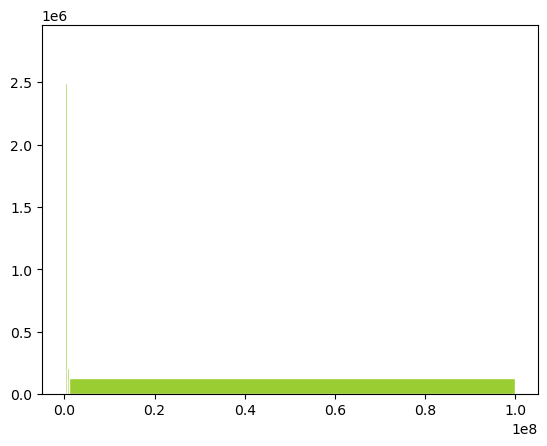

In [6]:
nonfraud_data = df[df['isFraud'] == 0]
# bins for the data
b = [0, 100, 5000, 100000, 500000, 1000000, 100000000]
plt.hist(nonfraud_data.amount, bins=b, color='yellowgreen', edgecolor='w')

([<matplotlib.axis.XTick at 0x264a6ac5110>,
 [Text(0, 0, '0'),
  Text(2000000, 0, '2000000'),
  Text(4000000, 0, '4000000'),
  Text(6000000, 0, '6000000'),
  Text(8000000, 0, '8000000'),
  Text(10000000, 0, '10000000')])

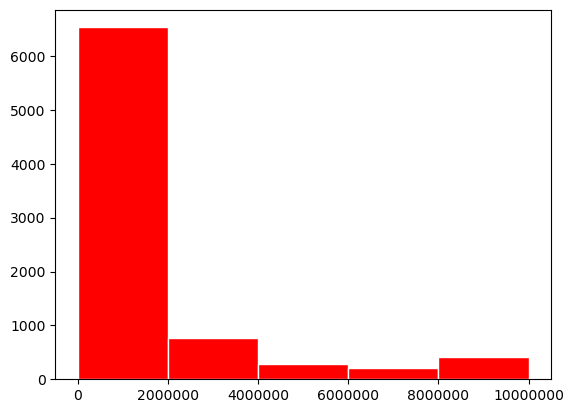

In [7]:
fraud_data = df[df['isFraud'] == 1]
# bins for the data
b_2 = [0, 2000000, 4000000, 6000000, 8000000, 10000000]
plt.hist(fraud_data.amount, bins=5, color='red', edgecolor='w')
plt.xticks(b_2, labels=['0', '2000000', '4000000', '6000000', '8000000', '10000000'])

## Project Introduction

Project topic: Digital fraud has been one of the biggest illegal markets in recent times. From black market websites selling credit card information to fishing messages trying to access your personal information, financial fraud is a big issue that currently needs to be tackled. Our project will be looking over a Kaggle database that presents different features of online transactions. This training data has a column with a boolean value of 0 or 1 telling us whether or not the transaction is fraudulent. With this information, we plan on finding trends within the data that tell us what factors most contribute to fraud.


Potential research questions you plan to address: 
What are indicators of credit card fraud attempts? 
What spending patterns that indicate fraud?  

Description of potential source data: 
"We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods."
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
https://www.kaggle.com/datasets/ealaxi/paysim1


Using the information above, we plan on plotting the data, finding a regression line, finding patterns with fraudulant and nonfrrudaulant data

QAC format that expands on your Part 1 report to add the following:
Your initial findings, including annotated code, visuals, and analyses used to discover them.
Include a procedural section that describes any major changes you made to Part 1 (e.g., new topic, new research questions), and a listing of anything you tried that didn't work out.
Credit listing of what each team member contributed to which parts when completing Part 2.
Any processed data files (in compressed form if large), preferably in CSV format.
Any additional Jupyter Notebooks containing material you left out of your primary notebook.

## Question 
What factors contribute to a transcation being flagged as fraud ? 


## Analysis 
 use mds and do the regression plot 

## Conclusion 


Add the compressed data file 

Team Member Contribution 